### Will a Customer Accept the Coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**


This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)

3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [4]:
data.isna().sum()


destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

We will drop the car collumn since the number of null entires is almost the entire data set. 

In [5]:
clean=data.drop('car',axis=1)#drops the entire column labled "car" 

In [6]:
get_na_count=clean.dropna()#drops unusable values
print("there will be "+str(len(get_na_count))+" rows remaining")#counts remaining rows and prints result

there will be 12079 rows remaining


Dropping all of the NA data leaves us with a significant amount to work with so we will drop the remaining NA values from the set

In [7]:
clean=data.dropna()#drops all remaining unusable rows while preserving original

4. What proportion of the total observations chose to accept the coupon? 



The description above tells us that a 1 in the Y column indicates coupon acceptance. We will use that to compute a percentage of total respondants. To get total respondants we use the original dataset since we have dropped some rows in our original set.

In [8]:
percent_cupon=data.Y.value_counts()[1]/len(data)#calculates percentage
print( "{:.0%}".format(percent_cupon)+" of coupons were accepted")#prints calculatoin in human readable format

57% of coupons were accepted


5. Use a bar plot to visualize the `coupon` column.

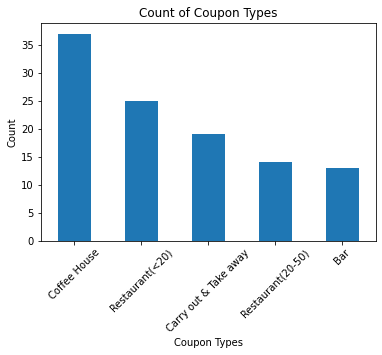

In [9]:
coupon_plot=clean['coupon'].value_counts().plot.bar(rot=45);
coupon_plot.set_xlabel("Coupon Types")
coupon_plot.set_ylabel("Count")
coupon_plot.set_title('Count of Coupon Types')
coupon_plot;

6. Use a histogram to visualize the temperature column.

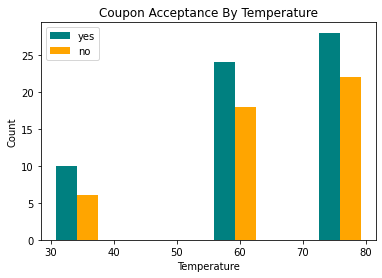

In [10]:
clean_Y = clean[clean['Y'] == 1] #gets only those who accepted coupon
clean_N= clean[clean['Y'] == 0] #gets those who did not accept coupn
plt.hist([clean_Y['temperature'], clean_N['temperature']], bins = 6, color =('teal','orange'), label=("yes", "no"))#makes plot
plt.legend(loc='best')#places legend
plt.title('Coupon Acceptance By Temperature')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()

The ratio of yes to no seems fairly consistant regardless of temperature

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [11]:
Bar_coupons=data[data['coupon'] == 'Bar'] #pulls only bar cupons using original data to mitigate effects from the dropna()

2. What proportion of bar coupons were accepted?


In [12]:
Bar_percent=len(Bar_coupons[Bar_coupons['Y']==1])/len(Bar_coupons)#calulates percentage of acceptance
print( "{:.0%}".format(Bar_percent)+' of bar coupons were accepted ')#prints calculatoin in human readable format

41% of bar coupons were accepted 


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


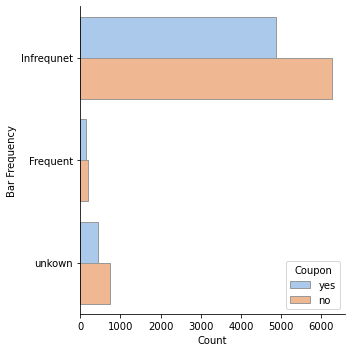

In [13]:
filters = [(data['Bar'].isin( ['never','less1','1~3'])),(data['Bar'].isin( ['gt8','4-8']))]#filters to group the values
values = ["Infrequnet", "Frequent"]#human readable replacement values 
data["Bar_freq"] = np.select(filters, values,default="unkown") #creates a new collumn for plotting with the readable values
#make plot
bar_freq_plot=sns.catplot(y="Bar_freq", hue="Y", kind="count",legend = False,palette="pastel", edgecolor=".6",data=data)
bar_freq_plot.set( xlabel = "Count", ylabel = "Bar Frequency")#label
plt.legend(title='Coupon', loc='best', labels=['yes', 'no']);#make legend

This graph compares the acceptance rate users who are known to frequent bars 3 times or more a month against those who visit bars less frequently. Below we can see that data numerically where 1 represents accpetance. 

In [14]:
bar_freq_numerical= pd.DataFrame(data.groupby(['Bar_freq','Y'])['Y'].count())#sorts the numerical data into something readable
bar_freq_numerical['percent'] = bar_freq_numerical.groupby(level=0).transform(lambda x: (x / x.sum()).round(2))
print(bar_freq_numerical)


                 Y  percent
Bar_freq   Y               
Frequent   0   148     0.42
           1   201     0.58
Infrequnet 0  4884     0.44
           1  6268     0.56
unkown     0   442     0.37
           1   741     0.63


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [15]:
data.age.replace('50plus','50',inplace=True) #replaces unsable string with approximation data
data.age.replace('below21','20',inplace=True) #replaces unusable string with approximation data
data['age']=data.age.astype(int)
print(type(data['age'][1]))

<class 'numpy.int32'>


In [16]:
Bar_over_25 = pd.merge(data[ (data['age']>25)], data[(data['Bar'].isin(['1~3','gt8','4-8']))])#creates a new dataframe with the new population
Bar_over_25_percent=len(Bar_over_25[Bar_over_25['Y']==1])/len(Bar_over_25)#calulates percentage of acceptance
print( "{:.0%}".format(Bar_over_25_percent)+' of bar coupons were accepted for this population')#prints calculatoin in human readable format

62% of bar coupons were accepted for this population


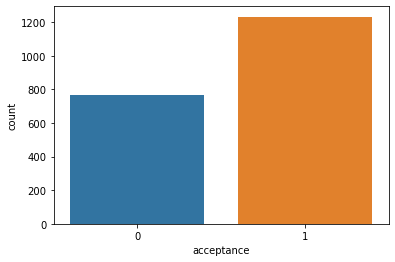

In [17]:
#make plot
over25plot=sns.countplot(x="Y", data=Bar_over_25)
over25plot.set( xlabel = "acceptance", ylabel = "count");#label


5. Construct a null and alternative hypothesis for the difference between groups of drivers who go to a bar more than once a month and are over the age of 25 to all other drivers. 

In [18]:
def null_test(sample,pop,alpha):#create null hypothesis test
    if alpha>abs(pop-sample): #checks if the absolute value of the difference between populations is less that the threshold
        print("null hypotheseis accepted, sample is statistically similar to the population")
    else :
        print("alternative hypothesis accepted the sample is statistically distinct from the population")    


6. Using alpha at 0.05 test your hypothesis and state your conclusion.

In [19]:
alpha=.05#set threshold
sample=Bar_over_25_percent#set sample 
pop=percent_cupon#set total population
null_test(sample,pop,alpha)#call the null hypothesis test

null hypotheseis accepted, sample is statistically similar to the population


7. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [20]:
problem_7df= pd.merge(pd.merge(
data[(data['passanger'].str.contains('Kid\(s\)')==False)],
data[(data['occupation'].str.contains('Farming Fishing & Forestry')==False)]),
data[(data['Bar'].isin(['1~3','gt8','4-8']))])#creates a new dataframe with the new population
problem_7_percent=len(problem_7df[problem_7df['Y']==1])/len(problem_7df)#calulates percentage of acceptance
print( "{:.0%}".format(problem_7_percent)+' of bar coupons were accepted for this population')#prints calculatoin in human readable format

62% of bar coupons were accepted for this population


In [21]:
alpha=.05#set threshold
sample=problem_7_percent#set sample 
pop=percent_cupon#set total population
null_test(sample,pop,alpha)#call the null hypothesis test

alternative hypothesis accepted the sample is statistically distinct from the population


8. Compare the acceptance rates between those passengers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [22]:
problem_8df= data[(
((data['Bar'].isin(['1~3','gt8','4-8']))&
(data['passanger'].str.contains('Kid\(s\)')==False)&
(data['passanger'].str.contains('widowed')==False))|
((data['Bar'].isin(['1~3','gt8','4-8']))&
(data['age']<30))|
((data['RestaurantLessThan20'].isin(['$12500 - $24999', '$25000 - $37499', 'Less than $12500', '$37500 - $49999']))&
(data['income'].isin(['4~8', '1~3', 'less1', 'gt8'])))
)]#creates a new dataframe with the new population
problem_8_percent=len(problem_8df[problem_8df['Y']==1])/len(problem_8df)#calulates percentage of acceptance
print( "{:.0%}".format(problem_8_percent)+' of bar coupons were accepted for this population')#prints calculatoin in human readable format

62% of bar coupons were accepted for this population


In [23]:
alpha=.05#set threshold
sample=problem_8_percent#set sample 
pop=percent_cupon#set total population
null_test(sample,pop,alpha)#call the null hypothesis test

alternative hypothesis accepted the sample is statistically distinct from the population


9.  Based on these observations, what do you hypothesize about passengers who accepted the bar coupons?

From the tests we have performed we have found some populations which exceed the threshold for statistical significance. Given that the variance of our sample populations within the bar cupon population was less than 1% and that the ratio of all bar cupons accepted was more than 20% lower than our samples I conclude that there is some population with a much lower acceptance rate which we have not yet discovered.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [24]:
coffee=data[(data['coupon'].str.contains('Coffee House'))]# selects coffee coupons

In [25]:
coffee=coffee.drop(['Bar','CoffeeHouse','CarryAway', 'RestaurantLessThan20','Restaurant20To50','car'],axis=1)#drops junk

In [26]:
from sklearn.preprocessing import OneHotEncoder# converts all values to numeric
encoder=OneHotEncoder(sparse=False,drop="if_binary")
for column in coffee:
    if coffee.dtypes[column]=='object':
        coffee_encoded = pd.DataFrame (encoder.fit_transform(coffee[[column]]))
        coffee_encoded.columns = encoder.get_feature_names([column])
        coffee.drop([column] ,axis=1, inplace=True)
        coffee= pd.concat([coffee_encoded, coffee ], axis=1)

In [27]:
coffee_corr=coffee.corr()# gets correlation for all features

In [28]:
print (coffee_corr.sort_values('Y', ascending=False)['Y'].head(6)) #Displays top 5 features 

Y                                                  1.000000
time_10AM                                          0.156659
passanger_Friend(s)                                0.119381
expiration_1d                                      0.114970
occupation_Student                                 0.099011
occupation_Healthcare Practitioners & Technical    0.075399
Name: Y, dtype: float64


The above list shows the 5 features which most strongly correlate to coupon acceptance and their correlation coefficient.